# Use SQLite db and SQL magic to query data & then conduct basic exploratory analysis

## original datasets
1. Socioeconomic Indicators in Chicago
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

2. Chicago Public Schools
This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

3. Chicago Crime Data
This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.

A detailed description of this dataset and the original dataset can be obtained from the Chicago Data Portal at: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

## subsampled practice data 
*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Chicago Census Data</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Chicago Public Schools</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Chicago Crime Data</a>

In [4]:
# initialize SQL db
import csv, sqlite3
con = sqlite3.connect("RealWorldData.db")
cur = con.cursor()
%load_ext sql
%sql sqlite:///RealWorldData.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @RealWorldData.db'

In [3]:
import pandas as pd

In [6]:
# load csv file and then save to SQL "RealWorldData.db"
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
df.to_sql("CENSUS", con, if_exists='replace', index=False,method="multi")

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv")
df.to_sql("CRIME", con, if_exists='replace', index=False, method="multi")

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv")
df.to_sql("SCHOOLS", con, if_exists='replace', index=False, method="multi")


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


### look at each table and aspects of the tables

In [7]:
# columns of each table
%%sql
SELECT * FROM CRIME
LIMIT 3

 * sqlite:///RealWorldData.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,0,0,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,0,0,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"


In [8]:
%%sql
SELECT * FROM CENSUS
LIMIT 3

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0


In [10]:
%%sql
SELECT * FROM SCHOOLS
LIMIT 3

 * sqlite:///RealWorldData.db
Done.


School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,Safety_Icon,SAFETY_SCORE,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,AVERAGE_STUDENT_ATTENDANCE,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,COLLEGE_ENROLLMENT,General_Services_Route,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Weak,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610185.pdf,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61.0,NDA,NDA,Average,50.0,Weak,36.0,Weak,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.74711093,-87.73170248,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"


In [11]:
# Find the total number of crimes recorded in the CRIME table
%%sql
SELECT COUNT(*) FROM CRIME

 * sqlite:///RealWorldData.db
Done.


COUNT(*)
533


In [12]:
# List community areas with per capita income less than 11000
%%sql
SELECT COMMUNITY_AREA_NAME FROM CENSUS
WHERE PER_CAPITA_INCOME < 11000

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME
West Garfield Park
South Lawndale
Fuller Park
Riverdale


In [13]:
# List all case numbers for crimes involving minors?
# (children are not considered minors for the purposes of crime analysis)
%%sql
SELECT CASE_NUMBER FROM CRIME
WHERE DESCRIPTION LIKE "%MINOR%"

 * sqlite:///RealWorldData.db
Done.


CASE_NUMBER
HL266884
HK238408


In [18]:
# List all kidnapping crimes involving a child?
%%sql
SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION FROM CRIME
WHERE PRIMARY_TYPE = 'KIDNAPPING' AND DESCRIPTION LIKE "%CHILD%"

 * sqlite:///RealWorldData.db
Done.


CASE_NUMBER,PRIMARY_TYPE,DESCRIPTION
HN144152,KIDNAPPING,CHILD ABDUCTION/STRANGER


In [63]:
# What kinds of crimes were recorded at schools?
%%sql
SELECT DISTINCT(PRIMARY_TYPE) FROM CRIME
WHERE LOCATION_DESCRIPTION LIKE "%SCHOOL%"

 * sqlite:///RealWorldData.db
Done.


PRIMARY_TYPE
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION


In [22]:
# List the average safety score for each type of school
%%sql
SELECT "Elementary, Middle, or High School", AVG(SAFETY_SCORE) FROM SCHOOLS
GROUP BY "Elementary, Middle, or High School"

 * sqlite:///RealWorldData.db
Done.


"Elementary, Middle, or High School",AVG(SAFETY_SCORE)
ES,49.52038369304557
HS,49.62352941176471
MS,48.0


In [25]:
# List 5 community areas with highest % of households below poverty line
%%sql
SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM CENSUS
ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC
LIMIT 5

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4


In [57]:
# Which community area is most crime prone?
%%sql
SELECT COMMUNITY_AREA_NUMBER, COUNT(COMMUNITY_AREA_NUMBER) AS CT  FROM CRIME
  GROUP BY COMMUNITY_AREA_NUMBER
  ORDER BY CT DESC
  LIMIT 1

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NUMBER,CT
25.0,43


In [46]:
# Which community area is most crime prone?
%%sql
SELECT COMMUNITY_AREA_NAME, R.COMMUNITY_AREA_NUMBER, COUNT(R.COMMUNITY_AREA_NUMBER) AS CT FROM CENSUS C, CRIME R
WHERE C.COMMUNITY_AREA_NUMBER = R.COMMUNITY_AREA_NUMBER
GROUP BY R.COMMUNITY_AREA_NUMBER
ORDER BY CT DESC
LIMIT 1

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,CT
Austin,25.0,43


In [64]:
# Use a sub-query to find the name of the community area with highest hardship index
%%sql
SELECT COMMUNITY_AREA_NAME FROM CENSUS
WHERE HARDSHIP_INDEX = (
  SELECT MAX(HARDSHIP_INDEX) FROM CENSUS
)

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME
Riverdale


In [50]:
# double check:
%%sql
SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM CENSUS
ORDER BY HARDSHIP_INDEX DESC
LIMIT 1

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME,HARDSHIP_INDEX
Riverdale,98.0


In [51]:
# Use a sub-query to determine the Community Area Name with most number of crimes?
%%sql
SELECT COMMUNITY_AREA_NAME, R.COMMUNITY_AREA_NUMBER, COUNT(R.COMMUNITY_AREA_NUMBER) AS CT FROM CENSUS C, CRIME R
WHERE C.COMMUNITY_AREA_NUMBER = R.COMMUNITY_AREA_NUMBER
GROUP BY R.COMMUNITY_AREA_NUMBER
ORDER BY CT DESC
LIMIT 1

 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER,CT
Austin,25.0,43


In [67]:
# Use a sub-query to determine the Community Area Name with most number of crimes?
%%sql
SELECT COMMUNITY_AREA_NAME FROM CENSUS 
WHERE COMMUNITY_AREA_NUMBER = (
  SELECT COMMUNITY_AREA_NUMBER FROM CRIME
  GROUP BY COMMUNITY_AREA_NUMBER
  ORDER BY COUNT(COMMUNITY_AREA_NUMBER) DESC
  )
LIMIT 1


 * sqlite:///RealWorldData.db
Done.


COMMUNITY_AREA_NAME
Austin


### Plot some results

 * sqlite:///RealWorldData.db
Done.


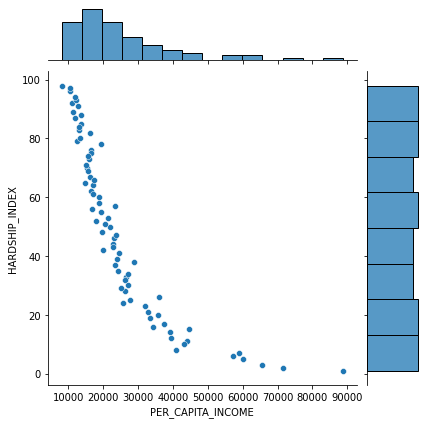

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX FROM CENSUS;
plot = sns.jointplot(x='PER_CAPITA_INCOME',y='HARDSHIP_INDEX', data=income_vs_hardship.DataFrame())
